In [1]:
%matplotlib inline
# Load the "autoreload" extension
%load_ext autoreload
# always reload modules
%autoreload 2
# black formatter for jupyter notebooks
# %load_ext nb_black
# black formatter for jupyter lab
%load_ext lab_black

%run ../../../src/notebook_env.py


---------------------------------
Working on the host: imarevic-pc

---------------------------------
Python version: 3.10.9 | packaged by conda-forge | (main, Feb  2 2023, 20:20:04) [GCC 11.3.0]

---------------------------------
Python interpreter: /home/imarevic/anaconda3/envs/srh/bin/python3.10


# Die Pandas Bibliothek

Die <a href="https://pandas.pydata.org//">Pandas-Bibliothek</a> wurde 2010 von <a href="https://wesmckinney.com/">Wes McKinney</a> entwickelt. pandas bietet **Datenstrukturen** und **Funktionen** für die Manipulation, Verarbeitung, Bereinigung und Verwertung von Daten. Im Python-Ökosystem ist pandas das modernste Werkzeug für die Arbeit mit tabellarischen oder tabellenähnlichen Daten, bei denen jede Spalte von einem anderen Typ sein kann (`String`, `numerisch`, `Datum` oder andere). pandas bietet ausgefeilte Indizierungsfunktionen, die das Umformen, Zerlegen, Aggregieren und Auswählen von Teilmengen von Daten erleichtern. pandas stützt sich auf andere Pakete, wie <a href="https://numpy.org/">NumPy</a> und <a href="https://scipy.org/">SciPy</a>. Außerdem integriert pandas <a href="https://matplotlib.org/">matplotlib</a> zum Plotten.

Wenn Sie neu im Umgang mit pandas sind, empfehlen wir Ihnen dringend, die sehr gut geschriebenen <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/tutorials.html">pandas-Tutorials</a> zu besuchen, die alle relevanten Abschnitte für neue Benutzer abdecken, um richtig loszulegen.

Nach der Installation (Details finden Sie in der <a href="https://pandas.pydata.org/pandas-docs/stable/getting_started/install.html">Dokumentation</a>) wird pandas mit dem kanonischen Alias `pd` importiert.

In [2]:
import pandas as pd

In [3]:
import numpy as np

Die Pandas-Bibliothek verfügt über zwei bewährte Datenstrukturen: **Series** und **DataFrame**.

  -  eindimensionales pd.Series-Objekt
  -  zweidimensionales pd.DataFrame-Objekt

## Das `pd.Series` Objekt

Erzeugung von Daten

In [2]:
# importiere das random module von numpy
from numpy import random

# setze seed
random.seed(123)
# Erzeuge 26 Zufallszahlen zwischen -10 and 10
my_data = random.randint(low=-10, high=10, size=26)
# Ausgabe
my_data

array([  3,  -8,  -8,  -4,   7,   9,   0,  -9, -10,   7,   5,  -1, -10,
         4, -10,   5,   9,   4,  -6, -10,   6,  -6,   7,  -7,  -8,  -3])

In [3]:
type(my_data)

numpy.ndarray

Eine Series ist ein eindimensionales Array-ähnliches Objekt, das ein Array mit Daten und ein zugehöriges Array mit Datenbeschriftungen, genannt Index, enthält. Wir erstellen ein `pd.Series-Objekt`, indem wir die Funktion `pd.Series()` aufrufen.

In [4]:
# Entkommentieren für Dokumentation

# docstring
# ?pd.Series

# source
# ??pd.Series

In [5]:
# Erzeuge pd.Series Objekt
s = pd.Series(data=my_data)
s

0      3
1     -8
2     -8
3     -4
4      7
5      9
6      0
7     -9
8    -10
9      7
10     5
11    -1
12   -10
13     4
14   -10
15     5
16     9
17     4
18    -6
19   -10
20     6
21    -6
22     7
23    -7
24    -8
25    -3
dtype: int64

In [6]:
type(s)

pandas.core.series.Series

### `pd.Series`-Attribute

Python-Objekte im Allgemeinen und die `pd.Series` im Besonderen bieten nützliche objektspezifische Attribute.

*Attribut* ->`OBJECT.attribute` 

*Beachten Sie, dass das Attribut ohne Klammern aufgerufen wird*

In [7]:
s.dtypes

dtype('int64')

In [8]:
s.index

RangeIndex(start=0, stop=26, step=1)

Wir können das Attribut `index` verwenden, um einem `pd.Series-Objekt` einen Index zuzuweisen.

Betrachten wir die Buchstaben des Alphabets....

In [9]:
import string

letters = string.ascii_uppercase
letters

'ABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [10]:
s.index = list(letters)
s

A     3
B    -8
C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
L    -1
M   -10
N     4
O   -10
P     5
Q     9
R     4
S    -6
T   -10
U     6
V    -6
W     7
X    -7
Y    -8
Z    -3
dtype: int64

### `pd.Series`-Methoden

In [11]:
s.sum()

-34

In [12]:
s.mean()

-1.3076923076923077

In [13]:
s.max()

9

In [14]:
s.min()

-10

In [15]:
s.median()

-2.0

In [16]:
s.quantile(q=0.5)

-2.0

In [17]:
s.quantile(q=[0.25, 0.5, 0.75])

0.25   -8.0
0.50   -2.0
0.75    5.0
dtype: float64

### Elementweise Arithmetik

Eine sehr nützliche Eigenschaft von `pd.Series`-Objekten ist, dass wir arithmetische Operationen *elementweise* anwenden können.

In [18]:
s + 10
# s*0.1
# 10/s
# s**2
# (2+s)*1**3
# s+s

A    13
B     2
C     2
D     6
E    17
F    19
G    10
H     1
I     0
J    17
K    15
L     9
M     0
N    14
O     0
P    15
Q    19
R    14
S     4
T     0
U    16
V     4
W    17
X     3
Y     2
Z     7
dtype: int64

### Auswahl und Indizierung

Eine weitere wichtige Datenoperation ist die Indizierung und Auswahl bestimmter Teilmengen des Datenobjekts. pandas verfügt über einen <a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html">sehr umfangreichen Satz</a> von Methoden für diese Art von Aufgaben.

In der einfachsten Form indizieren wir eine Reihe numpy-ähnlich, indem wir den `[ ]` Operator verwenden, um einen bestimmten `Index` der Reihe auszuwählen.

In [19]:
s

A     3
B    -8
C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
L    -1
M   -10
N     4
O   -10
P     5
Q     9
R     4
S    -6
T   -10
U     6
V    -6
W     7
X    -7
Y    -8
Z    -3
dtype: int64

In [20]:
s[3]

-4

In [21]:
s[2:6]

C   -8
D   -4
E    7
F    9
dtype: int64

In [22]:
s["C"]

-8

In [23]:
s["C":"K"]

C    -8
D    -4
E     7
F     9
G     0
H    -9
I   -10
J     7
K     5
dtype: int64

## Das `pd.DataFrame`-Objekt

Die primäre Datenstruktur von Pandas ist der `DataFrame`. Es handelt sich um eine zweidimensionale, größenveränderliche, potenziell heterogene tabellarische Datenstruktur mit Zeilen- und Spaltenbeschriftungen. Arithmetische Operationen richten sich sowohl auf Zeilen- als auch auf Spaltenbeschriftungen aus. Grundsätzlich kann man sich den `DataFrame` als einen `dictionary`-artigen Container für Seriesobjekte vorstellen.

**Erzeugen eines `DataFrame`-Objekts von Grund auf**

pandas erleichtert den Import verschiedener Datentypen und -quellen, aber für dieses Tutorial erzeugen wir ein DataFrame-Objekt von Grund auf.

Quelle: http://duelingdata.blogspot.de/2016/01/the-beatles.html

In [24]:
df = pd.DataFrame(
    {
        "id": range(1, 5),
        "Name": ["John", "Paul", "George", "Ringo"],
        "Last Name": ["Lennon", "McCartney", "Harrison", "Star"],
        "dead": [True, False, True, False],
        "year_born": [1940, 1942, 1943, 1940],
        "no_of_songs": [62, 58, 24, 3],
    }
)
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


### `pd.DataFrame`-Attribute

In [25]:
df.dtypes

id              int64
Name           object
Last Name      object
dead             bool
year_born       int64
no_of_songs     int64
dtype: object

In [26]:
# Achse 0
df.columns

Index(['id', 'Name', 'Last Name', 'dead', 'year_born', 'no_of_songs'], dtype='object')

In [27]:
# Achse 1
df.index

RangeIndex(start=0, stop=4, step=1)

### `pd.DataFrame`-Methoden

**Verschaffen Sie sich einen schnellen Überblick über den Datensatz**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           4 non-null      int64 
 1   Name         4 non-null      object
 2   Last Name    4 non-null      object
 3   dead         4 non-null      bool  
 4   year_born    4 non-null      int64 
 5   no_of_songs  4 non-null      int64 
dtypes: bool(1), int64(3), object(2)
memory usage: 292.0+ bytes


In [29]:
df.describe()

,id,year_born,no_of_songs
count,4.000000,4.00,4.000000
mean,2.500000,1941.25,36.750000
std,1.290994,1.50,28.229712
min,1.000000,1940.00,3.000000
25%,1.750000,1940.00,18.750000
50%,2.500000,1941.00,41.000000
75%,3.250000,1942.25,59.000000
max,4.000000,1943.00,62.000000


In [30]:
df.describe(include="all")

,id,Name,Last Name,dead,year_born,no_of_songs
count,4.000000,4,4,4,4.00,4.000000
unique,NaN,4,4,2,NaN,NaN
top,NaN,John,Lennon,True,NaN,NaN
freq,NaN,1,1,2,NaN,NaN
mean,2.500000,NaN,NaN,NaN,1941.25,36.750000
std,1.290994,NaN,NaN,NaN,1.50,28.229712
min,1.000000,NaN,NaN,NaN,1940.00,3.000000
25%,1.750000,NaN,NaN,NaN,1940.00,18.750000
50%,2.500000,NaN,NaN,NaN,1941.00,41.000000
75%,3.250000,NaN,NaN,NaN,1942.25,59.000000


**Index in die Variable `id` ändern**

In [31]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


In [32]:
df.set_index("id")

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


In [33]:
df

,id,Name,Last Name,dead,year_born,no_of_songs
0,1,John,Lennon,True,1940,62
1,2,Paul,McCartney,False,1942,58
2,3,George,Harrison,True,1943,24
3,4,Ringo,Star,False,1940,3


Beachten Sie, dass sich nichts geändert hat!!

Aus Gründen der Speicher- und Berechnungseffizienz gibt `Pandas` eine Ansicht des Objekts zurück, keine Kopie. Wenn wir also eine dauerhafte Änderung vornehmen wollen, müssen wir das Objekt einer Variablen zuweisen/neu zuordnen:

`df = df.set_index("id") `

oder einige Methoden haben das Argument `inplace=True`:

`df.set_index("id", inplace=True)`   

In [34]:
df = df.set_index("id")

In [35]:
df

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


**Arithmetische Methoden**

In [36]:
df

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


In [37]:
df.sum(axis=0)

Name                   JohnPaulGeorgeRingo
Last Name      LennonMcCartneyHarrisonStar
dead                                     2
year_born                             7765
no_of_songs                            147
dtype: object

In [38]:
df.sum(axis=1)

/tmp/ipykernel_428947/1459321664.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.sum(axis=1)


id
1    2003.0
2    2000.0
3    1968.0
4    1943.0
dtype: float64

### `Groupby`-Methode

<a href="https://www.jstatsoft.org/article/view/v040i01">Hadley Wickham 2011: The Split-Apply-Combine Strategy for Data Analysis, Journal of Statistical Software, 40(1)</a>

![Alt-Text](../_img/split-apply-combine.svg)

In [39]:
df

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


In [40]:
df.groupby("dead")

In [41]:
df.groupby("dead").sum()

,year_born,no_of_songs
dead,,
False,3882,61
True,3883,86


In [42]:
df.groupby("dead")["no_of_songs"].sum()

dead
False    61
True     86
Name: no_of_songs, dtype: int64

In [43]:
df.groupby("dead")["no_of_songs"].mean()

dead
False    30.5
True     43.0
Name: no_of_songs, dtype: float64

In [44]:
df.groupby("dead")["no_of_songs"].agg(["mean", "max", "min", "sum"])

,mean,max,min,sum
dead,,,,
False,30.5,58,3,61
True,43.0,62,24,86


### Familie von `apply/map`-Methoden

- `apply` arbeitet zeilenweise (`axis=0`, Standard) / spaltenweise (`axis=1`) auf einem `DataFrame`
- `applymap` arbeitet elementweise auf einem `DataFrame`
- `map` arbeitet elementweise mit einer `Series`.

In [45]:
df

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


In [46]:
# (axis=0, default)
df[["Name", "Last Name"]].apply(lambda x: x.sum())

Name                 JohnPaulGeorgeRingo
Last Name    LennonMcCartneyHarrisonStar
dtype: object

In [47]:
# (axis=1)
df[["Name", "Last Name"]].apply(lambda x: x.sum(), axis=1)

id
1        JohnLennon
2     PaulMcCartney
3    GeorgeHarrison
4         RingoStar
dtype: object

*... vielleicht ein nützlicherer Fall ...*

In [48]:
df.apply(lambda x: " ".join(x[["Name", "Last Name"]]), axis=1)

id
1        John Lennon
2     Paul McCartney
3    George Harrison
4         Ringo Star
dtype: object

## Auswahl und Indizierung

**Spaltenindex**

In [49]:
df["Name"]

id
1      John
2      Paul
3    George
4     Ringo
Name: Name, dtype: object

In [50]:
df[["Name", "Last Name"]]

,Name,Last Name
id,,
1,John,Lennon
2,Paul,McCartney
3,George,Harrison
4,Ringo,Star


In [51]:
df.dead

id
1     True
2    False
3     True
4    False
Name: dead, dtype: bool

**Zeilenindex**

Neben dem `[ ]`-Operator verfügt Pandas über weitere Indizierungsoperatoren wie `.loc[]` und `.iloc[]`, um nur einige zu nennen.

  -  `.loc[]` basiert hauptsächlich auf **Bezeichnungen**, kann aber auch mit einem booleschen Array verwendet werden.
 -   `.iloc[]` basiert in erster Linie auf **Ganzzahlpositionen** (von $0$ bis Länge $-1$ der Achse), kann aber auch mit einem booleschen Array verwendet werden.

In [52]:
df.head(2)

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58


In [53]:
df.loc[1]

Name             John
Last Name      Lennon
dead             True
year_born        1940
no_of_songs        62
Name: 1, dtype: object

In [54]:
df.iloc[1]

Name                Paul
Last Name      McCartney
dead               False
year_born           1942
no_of_songs           58
Name: 2, dtype: object

**Zeilen- und Spaltenindizes**

`df.loc[row, col]`

In [55]:
df.loc[1, "Last Name"]

'Lennon'

In [56]:
df.loc[2:4, ["Name", "dead"]]

,Name,dead
id,,
2,Paul,False
3,George,True
4,Ringo,False


**logisches Indizieren**

In [57]:
df

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58
3,George,Harrison,True,1943,24
4,Ringo,Star,False,1940,3


In [58]:
df["no_of_songs"] > 50

id
1     True
2     True
3    False
4    False
Name: no_of_songs, dtype: bool

In [59]:
df.loc[df["no_of_songs"] > 50]

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,True,1940,62
2,Paul,McCartney,False,1942,58


In [60]:
df.loc[(df["no_of_songs"] > 50) & (df["year_born"] >= 1942)]

,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
2,Paul,McCartney,False,1942,58


In [61]:
df.loc[(df["no_of_songs"] > 50) & (df["year_born"] >= 1942), ["Last Name", "Name"]]

,Last Name,Name
id,,
2,McCartney,Paul


## Manipulation von Spalten, Zeilen und bestimmten Einträgen

**Hinzufügen einer Zeile zum Datensatz**

In [62]:
from numpy import nan

df.loc[5] = ["Mickey", "Mouse", nan, 1928, nan]
df

/tmp/ipykernel_428947/1527406442.py:3: FutureWarning: Behavior when concatenating bool-dtype and numeric-dtype arrays is deprecated; in a future version these will cast to object dtype (instead of coercing bools to numeric values). To retain the old behavior, explicitly cast bool-dtype arrays to numeric dtype.
  df.loc[5] = ["Mickey", "Mouse", nan, 1928, nan]


,Name,Last Name,dead,year_born,no_of_songs
id,,,,,
1,John,Lennon,1.0,1940,62.0
2,Paul,McCartney,0.0,1942,58.0
3,George,Harrison,1.0,1943,24.0
4,Ringo,Star,0.0,1940,3.0
5,Mickey,Mouse,NaN,1928,NaN


In [63]:
df.dtypes

Name            object
Last Name       object
dead           float64
year_born        int64
no_of_songs    float64
dtype: object

Beachten Sie, dass sich die Variable `dead` geändert hat. Ihre Werte änderten sich von `True`/`False` zu `1.0`/`0.0`. Folglich änderte sich ihr `dtype` von `bool` zu `float64`.

**Hinzufügen einer Spalte zum Datensatz**

In [64]:
from datetime import datetime

datetime.today()

datetime.datetime(2023, 4, 28, 8, 51, 24, 137990)

In [65]:
now = datetime.today().year
now

2023

In [66]:
df["age"] = now - df.year_born
df

,Name,Last Name,dead,year_born,no_of_songs,age
id,,,,,,
1,John,Lennon,1.0,1940,62.0,83
2,Paul,McCartney,0.0,1942,58.0,81
3,George,Harrison,1.0,1943,24.0,80
4,Ringo,Star,0.0,1940,3.0,83
5,Mickey,Mouse,NaN,1928,NaN,95


**Einen bestimmten Eintrag ändern**

In [67]:
df.loc[5, "Name"] = "Minnie"

In [68]:
df

,Name,Last Name,dead,year_born,no_of_songs,age
id,,,,,,
1,John,Lennon,1.0,1940,62.0,83
2,Paul,McCartney,0.0,1942,58.0,81
3,George,Harrison,1.0,1943,24.0,80
4,Ringo,Star,0.0,1940,3.0,83
5,Minnie,Mouse,NaN,1928,NaN,95


## Plotten

Die Plotting-Funktionalität in Pandas basiert auf Matplotlib. Es ist recht praktisch, den Visualisierungsprozess mit der grundlegenden Pandas-Darstellung zu beginnen und zu matplotlib zu wechseln, um die Pandas-Visualisierung anzupassen.

### `plot`-Methoden

In [69]:
# dieser Aufruf bewirkt, dass die Zahlen unter den Codezellen eingezeichnet werden
%matplotlib inline

In [70]:
df

,Name,Last Name,dead,year_born,no_of_songs,age
id,,,,,,
1,John,Lennon,1.0,1940,62.0,83
2,Paul,McCartney,0.0,1942,58.0,81
3,George,Harrison,1.0,1943,24.0,80
4,Ringo,Star,0.0,1940,3.0,83
5,Minnie,Mouse,NaN,1928,NaN,95


<Axes: xlabel='id'>

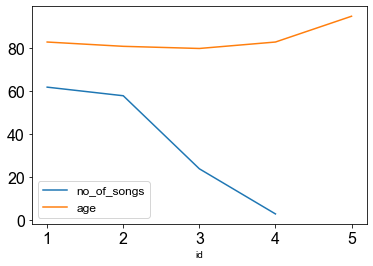

In [71]:
df[["no_of_songs", "age"]].plot()

<Axes: ylabel='Frequency'>

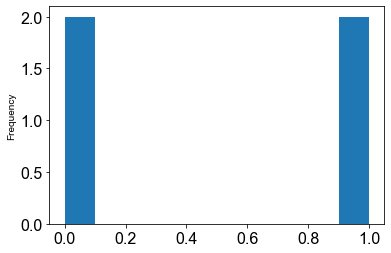

In [72]:
df["dead"].plot.hist()

<Axes: xlabel='id'>

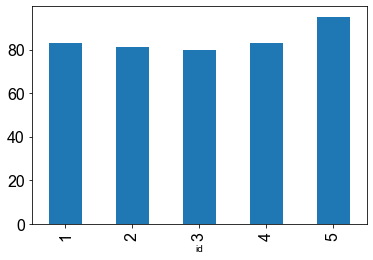

In [73]:
df["age"].plot.bar()

> __...einige Anmerkungen zum Plotten mit Python__

Das Plotten ist ein wesentlicher Bestandteil der Datenanalyse. Die Welt der Python-Visualisierung kann jedoch ein frustrierender Ort sein. Es gibt viele verschiedene Optionen, und die Auswahl der richtigen ist eine Herausforderung. (Wenn Sie sich trauen, werfen Sie einen Blick auf die <a href="https://github.com/rougier/python-visualization-landscape">Python-Visualisierungslandschaft</a>).

<a href="https://matplotlib.org/">matplotlib</a> ist wahrscheinlich die bekannteste Python-Bibliothek für 2D-Diagramme. Mit ihr lassen sich plattformübergreifend Zahlen in Publikationsqualität in einer Vielzahl von Formaten und interaktiven Umgebungen erstellen. Allerdings ist matplotlib aufgrund der komplexen Syntax und der Existenz zweier Schnittstellen, einer **MATLAB-ähnlichen zustandsbasierten Schnittstelle** und einer **objektorientierten Schnittstelle**, schwer zugänglich. Daher gibt **es immer mehr als eine Möglichkeit, eine Visualisierung zu erstellen**. Eine weitere Quelle der Verwirrung ist die Tatsache, dass matplotlib gut in andere Python-Bibliotheken integriert ist, wie z. B. <a href="https://pandas.pydata.org/index.html">pandas</a>, <a href="http://seaborn.pydata.org/index.html">seaborn</a>, <a href="https://xarray.pydata.org/en/stable/">xarray</a> und andere. Daher gibt es Verwirrung darüber, wann man die reine matplotlib oder ein Tool, das auf matplotlib aufbaut, verwenden sollte.

Wir importieren die `matplotlib`-Bibliothek und das `pyplot`-Modul von matplotlib mit den folgenden kanonischen Befehlen

`import matplotlib as mpl`
`import matplotlib.pyplot as plt`

In Bezug auf die Terminologie von matplotlib ist es wichtig zu verstehen, dass die `Figure` das endgültige Bild ist, das eine oder mehrere `Axes` enthalten kann, und dass die  `Axes` eine individuelle Darstellung repräsentieren.

Um ein `Figure`-Objekt zu erstellen, rufen wir

`fig = plt.figure()` auf.

Ein bequemerer Weg, ein `Figure`-Objekt und ein `Axes`-Objekt auf einmal zu erstellen, ist jedoch der Aufruf

`fig, ax = plt.subplots()` 

Dann können wir das `Axes`-Objekt verwenden, um Daten für die Darstellung hinzuzufügen.

Text(0.5, 1.0, 'The Beatles and ... something else')

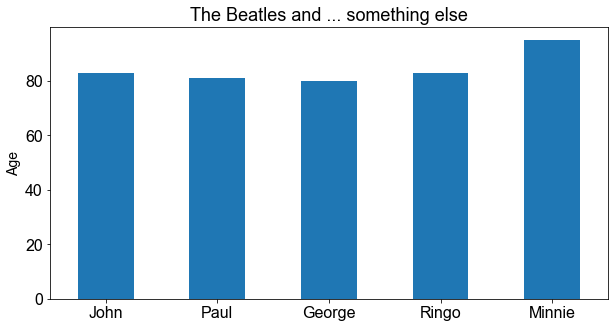

In [74]:
import matplotlib.pyplot as plt

# Erzeuge Figure und Axes Objekt
fig, ax = plt.subplots(figsize=(10, 5))

# plot die Daten und referenzier das Axes Objekt
df["age"].plot.bar(ax=ax)

# Passe das Axes Objekt an
ax.set_xticklabels(df["Name"], rotation=0)
ax.set_xlabel("")
ax.set_ylabel("Age", size=14)
ax.set_title("The Beatles and ... something else", size=18)

Beachten Sie, dass wir nur an der Oberfläche der Plot-Möglichkeiten mit Pandas kratzen. In der Online-Dokumentation von Pandas (<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html">hier</a>) finden Sie einen umfassenden Überblick.